In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import  MiniBatchKMeans
import numpy as np
import pandas as pd
from joblib import dump, load

%autosave 0 

Autosave disabled


In [2]:


class HMM (object):
             def __init__(self,A,B,PI):
                 self.A=A
                 self.B=B
                 self.PI=PI   
def viterbi(obs,Modelo1,PI):
    
    delta=np.zeros((len(obs)+1,len(Modelo1.A)))
    phi=np.zeros((len(obs)+1,len(A)))+666
    path =np.zeros(len(obs)+1)
    T=len(obs)
    Modelo1.PI = PI
    delta[0,:]= Modelo1.PI * Modelo1.B[:,obs[0]]
    phi[0,:]=666
    for t in range(len(obs)):
        for j in range(delta.shape[1]):

            delta [t+1,j]=np.max(delta[t] * A[:,j]) * B[j,obs[t]]
            phi[t+1,j]= np.argmax(delta[t] * A[:,j])
    path[T]=int(np.argmax(delta[T,:]))
    for i in np.arange(T-1,0,-1):
        #print (i,phi[i+1,int(path[i+1])])
        path[i]=phi[i+1,int(path[i+1])]
    return(path)
def cuantizar_xy(xy, cc):
    xycuant=cc
    out=np.power(xycuant-xy,2).sum(axis=1).argmin()
    return out
    
def path_to_xy(path,ccxy):
    estimated= pd.DataFrame(path.astype(int).T)
    estimated.columns=[['Path_vit']]
    estimated['xcuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,0])
    estimated['ycuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,1])                                
    return (estimated)
def quantized(xyth,ccxyth):
    xythcuant=np.argmin(np.linalg.norm(xyth-ccxyth,axis=1))
    x,y=ccxyth[xythcuant,:2]
    return ((x,y),(xythcuant))



In [3]:
def Markov_A_2_grafo(A,ccxyth):
    dists=np.zeros(A.shape)
    for i in range(A.shape[0]):
        for j in range (A.shape[1]):
            if A[i,j]!=0 :
                dists[i,j]= np.linalg.norm(ccxyth[i]-ccxyth[j])    
    
    
    con = np.where(dists==0,np.inf,dists)
    graphe2=grafo(ccxyth,con)
    return graphe2


class node(object):
    def __init__(self,x,y):
        self.x=x
        self.y=y
        
        
class grafo (object):
             def __init__(self,nodos,conec):
                 self.nodos=nodos
                 self.conec=conec        

def dijkstra(nodoinicial,nodofinal,graphe):
    

    numnodos= len(graphe.nodos)
    con = graphe.conec
    D= np.ones(numnodos)*np.inf
    Prv= np.ones(numnodos)*np.inf
    V= np.zeros(numnodos)
    a = nodoinicial
    D[a]=0
    Prv[a]=0
    Prv[np.where(con[a]!=np.inf)]=a
    V[a]=1
    Dacc=D[a]
    ########
    D=np.minimum(D,con[a]+D[a])
    cont=0
    sucess=False
    while(sucess==False):
        a = np.argmin(D+np.where (V==1,np.inf, V))
        Dacc=D[a]
        Prv[np.where(D>(con[a]+Dacc) )]=a
        V[a]=1
        D=np.minimum(D,con[a]+Dacc)
        if (a== nodofinal):
            print("RUTA CALCULADA ")
            sucess=True
    rutainv=[]
    rutainv.append(nodofinal)
    while(rutainv[-1]!=nodoinicial):
        prv=Prv[int(rutainv[-1])]
        rutainv.append(prv)

    ruta=[]
    for n in reversed(rutainv):
        ruta.append(n)
    return(ruta)


In [4]:
only_nice=False
data=pd.read_csv('lecturas_img_conodometria.txt')
#data=data.iloc[:1000,:]

cols=['x','y','theta']
n_reads=data.shape[1]-3
n_reads
etiquetas=[]
for i in range (n_reads):
    etiquetas.append('Corners'+str(i))

        
for lab in cols:
    etiquetas.append(lab)


data.columns=etiquetas

"""if (only_nice!=True):
    print("NOT ONLY NICE")
    data2=pd.read_csv('lecturasconodometria.txt')
    data2.columns=etiquetas
    data3= pd.concat((data,data2))
    data=data3

"""



####
#index = data[data.y<-1].index
#data=data.drop(index)
data.describe()



#####

xyth=data[['x','y','theta']]

lecs=data.iloc[:,0:n_reads]


data.describe()


,Corners0,Corners1,Corners2,Corners3,Corners4,Corners5,Corners6,Corners7,Corners8,Corners9,...,Corners193,Corners194,Corners195,Corners196,Corners197,Corners198,Corners199,x,y,theta
count,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,...,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000
mean,222.126195,253.725401,211.183703,260.591411,214.172672,259.063833,217.164583,255.366524,218.647742,259.262539,...,255.705986,301.019268,257.035888,298.263862,256.786880,299.454332,254.959112,0.408226,1.395762,-0.136885
std,95.825734,124.811153,90.338880,121.015935,90.468786,112.947469,90.943027,110.111855,91.312433,105.981038,...,140.405735,147.191508,140.076661,146.485851,140.467358,148.017113,139.419768,2.212990,2.591991,1.769960
min,3.000000,1.000000,5.000000,1.000000,4.000000,1.000000,4.000000,1.000000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-4.233955,-5.518083,-3.140949
25%,114.000000,163.000000,114.000000,163.000000,115.500000,164.000000,136.000000,164.000000,137.000000,203.000000,...,143.000000,211.000000,145.000000,209.000000,146.000000,207.000000,145.000000,-0.597268,-0.118496,-1.738213
50%,258.000000,226.000000,233.000000,235.000000,235.000000,235.000000,238.000000,234.000000,244.000000,235.000000,...,264.000000,321.000000,266.000000,319.000000,267.000000,319.000000,262.000000,0.518868,0.912664,-0.100418
75%,299.000000,374.000000,286.000000,374.000000,286.000000,356.000000,285.000000,335.000000,282.000000,334.000000,...,379.000000,405.000000,382.000000,400.500000,382.000000,405.000000,378.000000,1.958639,3.861029,1.532459
max,633.000000,478.000000,636.000000,478.000000,635.000000,478.000000,634.000000,478.000000,637.000000,478.000000,...,478.000000,638.000000,478.000000,638.000000,478.000000,638.000000,478.000000,4.387493,5.981423,3.139732


In [5]:
data.head()

,Corners0,Corners1,Corners2,Corners3,Corners4,Corners5,Corners6,Corners7,Corners8,Corners9,...,Corners193,Corners194,Corners195,Corners196,Corners197,Corners198,Corners199,x,y,theta
0,337.0,154.0,223.0,242.0,286.0,164.0,287.0,179.0,357.0,251.0,...,28.0,338.0,361.0,255.0,319.0,562.0,419.0,0.037532,-0.010451,-0.290776
1,337.0,151.0,286.0,161.0,357.0,249.0,287.0,175.0,115.0,345.0,...,370.0,273.0,285.0,483.0,370.0,176.0,1.0,0.037982,-0.010142,-0.497348
2,336.0,188.0,288.0,211.0,357.0,283.0,314.0,25.0,139.0,303.0,...,371.0,289.0,27.0,474.0,348.0,296.0,190.0,0.038412,-0.010592,-0.467340
3,336.0,186.0,314.0,20.0,288.0,208.0,219.0,247.0,114.0,328.0,...,373.0,291.0,363.0,590.0,470.0,452.0,469.0,0.038285,-0.010494,-0.333303
4,338.0,140.0,357.0,240.0,114.0,317.0,110.0,97.0,286.0,165.0,...,351.0,183.0,464.0,547.0,439.0,143.0,174.0,0.037911,-0.010097,-0.330922


In [6]:
data.fillna(0)
lecs=data.iloc[:,0:n_reads]


In [7]:
get_new_ccs= True
if get_new_ccs:
    
    K_corpus=256
    N=128
    
    kmedias=MiniBatchKMeans(init='k-means++', n_clusters=K_corpus, batch_size=1000,
                      n_init=10, max_no_improvement=10, verbose=0)
    kmedias.fit(lecs)
    ccvk=kmedias.cluster_centers_
    mbk = MiniBatchKMeans(init='k-means++', n_clusters=N, batch_size=1000,
                      n_init=10, max_no_improvement=10, verbose=0)
    mbk.fit(xyth)
    ccxyth=mbk.cluster_centers_
else:
    ccxyth,ccvk=np.load('ccxyth.npy'),np.load('ccvk.npy')
    print("CUANTIZANDO SIN RECALCULAR CC")
aus=[]
auvks=[]
for i,lec in zip(xyth.values, lecs.values):
    _, au= quantized(i , ccxyth)
    aus.append(au)

    auvk= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax()
    auvks.append(auvk)


data['Y']=aus
data['Vk']=auvks
obs,est= data['Vk'].values,data['Y'].values
"""np.save('obs.npy',obs)
np.save('est.npy',est)
np.save ('ccxyth.npy',ccxyth)
np.save ('ccvk.npy',ccvk)
data.to_csv('pddata.csv')    
print('new obs/ est almacenados')
"""data['Y'].describe()   

new obs/ est almacenados


count    6799.000000
mean       57.214885
std        37.151881
min         0.000000
25%        24.000000
50%        54.000000
75%        90.000000
max       127.000000
Name: Y, dtype: float64

In [8]:
lecs.where(data>1100).isna().values.any()

True

In [9]:
####BAUM WELCH APPROX###############???!?!?!


N=est.max()+1 
K_corpus= obs.max()+1
TRANS=np.zeros((N,N))
for i in range (N):
    fromTO=[]


    indices=np.asarray(np.where(est==i)).ravel()
   

    for indice in indices:

        if (int(indice)==len(est)-1):
            
            indice=indice-1

        fromTO.append(est[indice+1])
    fromTO.append(0)
    fromTO.append(N-1)
    aux=np.asarray(np.bincount(fromTO    ))
    aux[0]=aux[0]-1
    aux[N-1]=aux[N-1]-1
    
    TRANS[i,:]=aux
TRANS=TRANS/TRANS.sum(axis=1)
#####################################3
EMIS= np.zeros((N,K_corpus))
for Vk in range (K_corpus):

    indices=np.asarray(np.where(obs==Vk)).ravel()
    estconvk= est[indices]

    numestenvk=np.bincount(estconvk)
    if (N-len(numestenvk)>0):
        numestenvk=np.append(numestenvk, np.zeros(N-len(numestenvk)))
    EMIS[:,Vk]=(numestenvk/np.bincount(est))

A,B=TRANS,EMIS
PI=np.ones(N)/N
Modelo1=HMM(A,B,PI)
Modelo2= HMM(A,B,PI)
Modelo2.B=B+.0000001
Modelo2.A=A+.0000001




#np.linalg.norm(Modelo1.A-Modelo2.A)
np.save('A.npy',Modelo1.A)
np.save('B.npy',Modelo1.B)
np.save('PI.npy',Modelo1.PI)
print("MODEL SAVED")
B.shape

MODEL SAVED


(128, 254)

In [10]:
B[1,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.21212121, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
def accuracy(yhat,ytrue):
    weights=[.5,.2,.1,.05,.05]
    if len (yhat)>=5:
        yhat=yhat[-5:]
        ytrue=ytrue[-5:]
        accuracy=np.dot((yhat==ytrue),weights)
        return accuracy

datamugroso=pd.read_csv('pddata.csv')
data= datamugroso.iloc[:,1:]
data.describe()

,Corners0,Corners1,Corners2,Corners3,Corners4,Corners5,Corners6,Corners7,Corners8,Corners9,...,Corners195,Corners196,Corners197,Corners198,Corners199,x,y,theta,Y,Vk
count,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,...,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000
mean,222.126195,253.725401,211.183703,260.591411,214.172672,259.063833,217.164583,255.366524,218.647742,259.262539,...,257.035888,298.263862,256.786880,299.454332,254.959112,0.408226,1.395762,-0.136885,57.214885,90.136196
std,95.825734,124.811153,90.338880,121.015935,90.468786,112.947469,90.943027,110.111855,91.312433,105.981038,...,140.076661,146.485851,140.467358,148.017113,139.419768,2.212990,2.591991,1.769960,37.151881,58.329375
min,3.000000,1.000000,5.000000,1.000000,4.000000,1.000000,4.000000,1.000000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-4.233955,-5.518083,-3.140949,0.000000,20.000000
25%,114.000000,163.000000,114.000000,163.000000,115.500000,164.000000,136.000000,164.000000,137.000000,203.000000,...,145.000000,209.000000,146.000000,207.000000,145.000000,-0.597268,-0.118496,-1.738213,24.000000,76.000000
50%,258.000000,226.000000,233.000000,235.000000,235.000000,235.000000,238.000000,234.000000,244.000000,235.000000,...,266.000000,319.000000,267.000000,319.000000,262.000000,0.518868,0.912664,-0.100418,54.000000,76.000000
75%,299.000000,374.000000,286.000000,374.000000,286.000000,356.000000,285.000000,335.000000,282.000000,334.000000,...,382.000000,400.500000,382.000000,405.000000,378.000000,1.958639,3.861029,1.532459,90.000000,76.000000
max,633.000000,478.000000,636.000000,478.000000,635.000000,478.000000,634.000000,478.000000,637.000000,478.000000,...,478.000000,638.000000,478.000000,638.000000,478.000000,4.387493,5.981423,3.139732,127.000000,253.000000


In [12]:



buf_vit=90
for i in range(1):
    
    indice= int(np.random.rand()*(len(obs)-2*buf_vit))
    obs_windowed= obs[indice:indice+buf_vit]
    est_windowed= est[indice:indice+buf_vit]
    odomreal= data[['x','y']].iloc[indice:indice+buf_vit]
    #print(data[['x','y']].iloc[indice:indice+buf_vit],est_windowed)

    print(indice)
    path= viterbi(obs_windowed,Modelo1,Modelo1.PI)
    path2= viterbi(obs_windowed,Modelo2,Modelo2.PI)
    yhat=np.zeros(len(path)-1)
    yhat2=np.zeros(len(path2)-1)
    ytrue=np.zeros(len(path)-1)
    for i in range(len(path)-1):
        yhat[i]=int(path[i])
        yhat2[i]=int(path2[i])
        ytrue[i]=int(est_windowed[i])
    print(accuracy(ytrue,yhat), accuracy(ytrue,yhat2))

4076
0.0 0.0


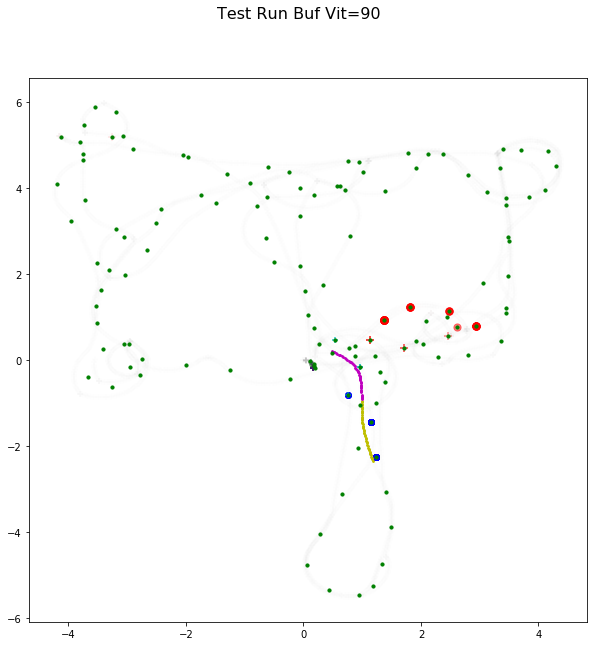

In [13]:
cc=ccxyth
paths= viterbi(obs_windowed,Modelo2,Modelo2.PI)
path=paths[int(-len(paths)/2):]
path_bigdelay = paths[:int(-len(paths)/2)]
cords= path_to_xy(path,cc)
cords_bigdelay = path_to_xy(path_bigdelay,cc)
cords1=path_to_xy(est_windowed.T[int(-len(paths)/2):],cc)
cords1delay=path_to_xy(est_windowed.T[:int(-len(paths)/2)],cc)



fig = plt.figure(figsize=(10,10))
fig.suptitle('Test Run Buf Vit=90', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.00313)

ax1.scatter(x=cords.xcuant, y=cords.ycuant, marker='o',c='r',s=52,alpha=.5 , )
ax1.scatter(x=cords_bigdelay.xcuant, y=cords_bigdelay.ycuant, marker='+',c='r',s=52,alpha=.1 )
ax1.scatter(x=cords1.xcuant, y=cords1.ycuant, marker='o',c='b' ,alpha=1)
ax1.scatter(x=cords1delay.xcuant, y=cords1delay.ycuant, marker='+',c='c' ,alpha=.1)



ax1.scatter(x= odomreal.x[int(-len(paths)/2):], y=odomreal.y[int(-len(paths)/2):],marker='.',s=13,c='y')
ax1.scatter(x= odomreal.x[:int(-len(paths)/2)], y=odomreal.y[:int(-len(paths)/2)],marker='.',s=13,c='m')
cords3=path_to_xy(np.arange(0,Modelo1.A.shape[0]),cc)
ax1.scatter(x= cords3.xcuant, y=cords3.ycuant ,marker='.',s=40,c='g')



In [14]:



buf_vit=30
for i in range(1):
    
    
    obs_windowed= obs[indice:indice+buf_vit]
    est_windowed= est[indice:indice+buf_vit]
    odomreal= data[['x','y']].iloc[indice:indice+buf_vit]
    #print(data[['x','y']].iloc[indice:indice+buf_vit],est_windowed)

    print(indice)
    path= viterbi(obs_windowed,Modelo1,Modelo1.PI)
    path2= viterbi(obs_windowed,Modelo2,Modelo2.PI)
    yhat=np.zeros(len(path)-1)
    yhat2=np.zeros(len(path2)-1)
    ytrue=np.zeros(len(path)-1)
    for i in range(len(path)-1):
        yhat[i]=int(path[i])
        yhat2[i]=int(path2[i])
        ytrue[i]=int(est_windowed[i])
    print(accuracy(ytrue,yhat), accuracy(ytrue,yhat2))

4076
0.0 0.0


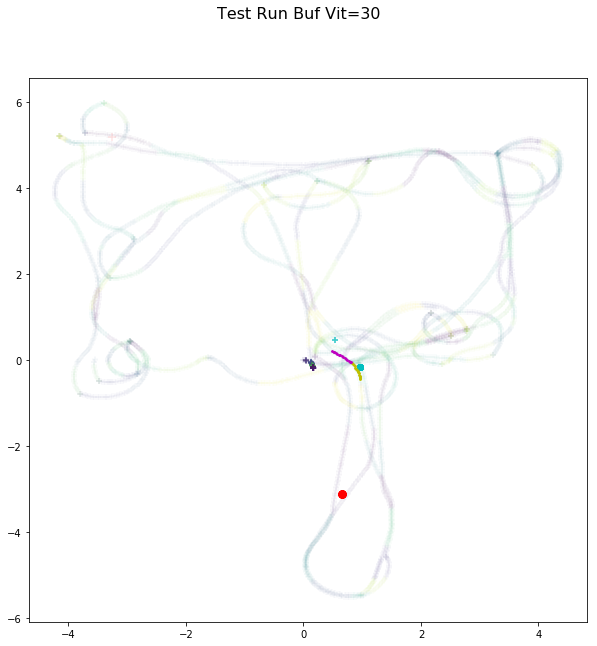

In [15]:
cc=ccxyth
paths= viterbi(obs_windowed,Modelo2,Modelo2.PI)
path=paths[int(-len(paths)/2):]
path_bigdelay = paths[:int(-len(paths)/2)]
cords= path_to_xy(path,cc)
cords_bigdelay = path_to_xy(path_bigdelay,cc)
cords1=path_to_xy(est_windowed.T[int(-len(paths)/2):],cc)
cords1delay=path_to_xy(est_windowed.T[:int(-len(paths)/2)],cc)



fig = plt.figure(figsize=(10,10))
fig.suptitle('Test Run Buf Vit=30', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.0313)

ax1.scatter(x=cords.xcuant, y=cords.ycuant, marker='o',c='r',s=52,alpha=.5 )
ax1.scatter(x=cords_bigdelay.xcuant, y=cords_bigdelay.ycuant, marker='+',c='r',s=52,alpha=.1 )
ax1.scatter(x=cords1.xcuant, y=cords1.ycuant, marker='o',c='c' ,alpha=.5)
ax1.scatter(x=cords1delay.xcuant, y=cords1delay.ycuant, marker='+',c='c' ,alpha=.1)



ax1.scatter(x= odomreal.x[int(-len(paths)/2):], y=odomreal.y[int(-len(paths)/2):],marker='.',s=13,c='y')
ax1.scatter(x= odomreal.x[:int(-len(paths)/2)], y=odomreal.y[:int(-len(paths)/2)],marker='.',s=13,c='m')



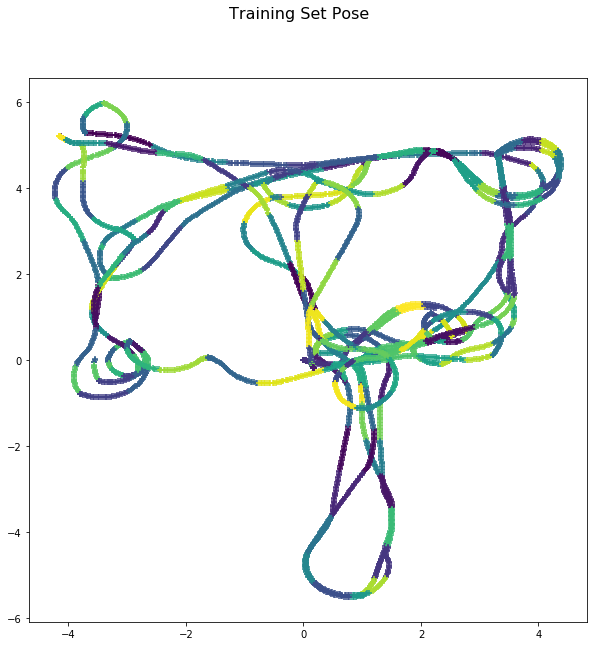

In [16]:


fig = plt.figure(figsize=(10,10))
fig.suptitle('Training Set Pose', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y)


In [17]:
nodes= ccxyth[:5,:]
conec=np.ones((len(nodes),5))*np.inf
conec[1,0],conec[0,1]=.3 , .3
conec[4,0],conec[0,4]=.7 , .7
conec[1,2],conec[2,1]=.1 , .1
conec[1,3],conec[3,1]=.3 , .3
conec[4,3],conec[3,4]=.2 , .2
graphe= grafo(nodes,conec )
graphe.conec

array([[inf, 0.3, inf, inf, 0.7],
       [0.3, inf, 0.1, 0.3, inf],
       [inf, 0.1, inf, inf, inf],
       [inf, 0.3, inf, inf, 0.2],
       [0.7, inf, inf, 0.2, inf]])

In [18]:
ruta=dijkstra(0,4,graphe)
ruta

RUTA CALCULADA 


[0.0, 4]

In [19]:
graphe= Markov_A_2_grafo(A,ccxyth)
graphe.conec[1,:]

array([       inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        

In [20]:

def Markov_A_2_grafo(A,ccxyth):
    dists=np.zeros(A.shape)
    for i in range(A.shape[0]):
        for j in range (A.shape[1]):
            if A[i,j]!=0 :
                dists[i,j]= np.linalg.norm(ccxyth[i]-ccxyth[j])    
    
    
    con = np.where(dists==0,np.inf,dists)
    graphe2=grafo(ccxyth,con)
    return graphe2


In [21]:
graphe= Markov_A_2_grafo(A,ccxyth)
graphe.conec[1,:]

array([       inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        

In [22]:
"""nodoinicial=1
nodofinal=3
numnodos= len(graphe.nodos)
con = graphe.conec
D= np.ones(numnodos)*np.inf
Prv= np.ones(numnodos)*np.inf
V= np.zeros(numnodos)
a = nodoinicial
D[a]=0
Prv[a]=0
Prv[np.where(con[a]!=np.inf)]=a
V[a]=1
Dacc=D[a]
########
D=np.minimum(D,con[a]+D[a])
cont=0
sucess=False
while(sucess==False):
    a = np.argmin(D+np.where (V==1,np.inf, V))
    Dacc=D[a]
    Prv[np.where(D>(con[a]+Dacc) )]=a
    V[a]=1
    D=np.minimum(D,con[a]+Dacc)
    if (a== nodofinal):
        print("RUTA CALCULADA ")
        sucess=True
rutainv=[]
rutainv.append(nodofinal)
while(rutainv[-1]!=nodoinicial):
    prv=Prv[int(rutainv[-1])]
    rutainv.append(prv)
   
ruta=[]
for n in reversed(rutainv):
    ruta.append(n)
"""

'nodoinicial=1\nnodofinal=3\nnumnodos= len(graphe.nodos)\ncon = graphe.conec\nD= np.ones(numnodos)*np.inf\nPrv= np.ones(numnodos)*np.inf\nV= np.zeros(numnodos)\na = nodoinicial\nD[a]=0\nPrv[a]=0\nPrv[np.where(con[a]!=np.inf)]=a\nV[a]=1\nDacc=D[a]\n########\nD=np.minimum(D,con[a]+D[a])\ncont=0\nsucess=False\nwhile(sucess==False):\n    a = np.argmin(D+np.where (V==1,np.inf, V))\n    Dacc=D[a]\n    Prv[np.where(D>(con[a]+Dacc) )]=a\n    V[a]=1\n    D=np.minimum(D,con[a]+Dacc)\n    if (a== nodofinal):\n        print("RUTA CALCULADA ")\n        sucess=True\nrutainv=[]\nrutainv.append(nodofinal)\nwhile(rutainv[-1]!=nodoinicial):\n    prv=Prv[int(rutainv[-1])]\n    rutainv.append(prv)\n   \nruta=[]\nfor n in reversed(rutainv):\n    ruta.append(n)\n'

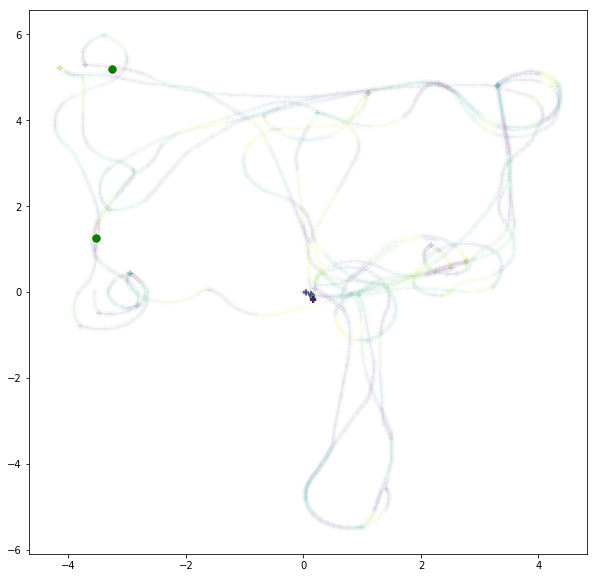

In [23]:
#ruta.append(nodofinal)
path=np.array(ruta)
path
cords_path= path_to_xy(path,cc)
#cords_path= path_to_xy(path[:int(len(path)/2)],cc)

cords_path2= path_to_xy(path,cc)



fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.0313)

ax1.scatter(x=cords_path.xcuant, y=cords_path.ycuant, marker='o',c='r',s=52,alpha=.5 )
ax1.scatter(x=cords_path2.xcuant, y=cords_path2.ycuant, marker='o',c='g',s=52 )


In [24]:

def dijkstra(nodoinicial,nodofinal,graphe):

    numnodos= len(graphe.nodos)
    con = graphe.conec
    D= np.ones(numnodos)*np.inf
    Prv= np.ones(numnodos)*np.inf
    V= np.zeros(numnodos)
    a = nodoinicial
    D[a]=0
    Prv[a]=0
    Prv[np.where(con[a]!=np.inf)]=a
    V[a]=1
    Dacc=D[a]
    ########
    D=np.minimum(D,con[a]+D[a])
    cont=0
    sucess=False
    while(sucess==False):
        a = np.argmin(D+np.where (V==1,np.inf, V))
        Dacc=D[a]
        Prv[np.where(D>(con[a]+Dacc) )]=a
        V[a]=1
        D=np.minimum(D,con[a]+Dacc)
        if (a== nodofinal):
            print("RUTA CALCULADA ")
            sucess=True
    rutainv=[]
    rutainv.append(nodofinal)
    while(rutainv[-1]!=nodoinicial):
        prv=Prv[int(rutainv[-1])]
        rutainv.append(prv)

    ruta=[]
    for n in reversed(rutainv):
        ruta.append(n)
    return(ruta)


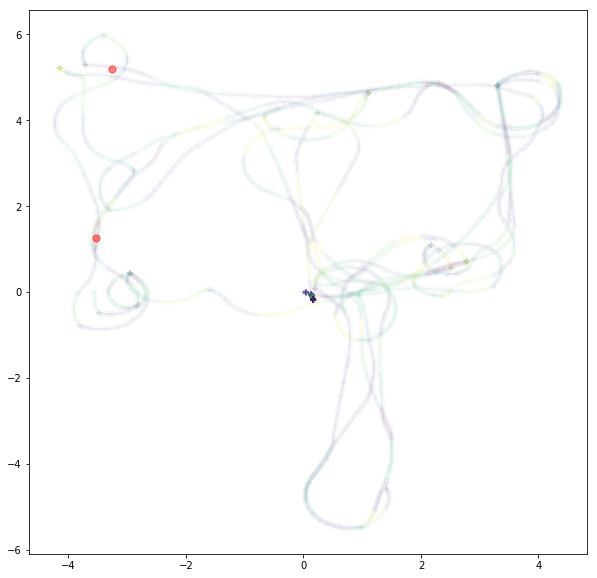

In [25]:
path=np.array(ruta)


cords_path= path_to_xy(path,cc)
#cords_path= path_to_xy(path[:int(len(path)/2)],cc)
#cords_path2= path_to_xy(path[int(len(path)/2):],cc)



fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.0313)

ax1.scatter(x=cords_path.xcuant, y=cords_path.ycuant, marker='o',c='r',s=52,alpha=.5 )
#ax1.scatter(x=cords_path2.xcuant, y=cords_path2.ycuant, marker='o',c='g',s=52,alpha=.5 )

In [26]:
#lec=np.load('lec.npy')
index_forlec=data.Vk.value_counts().iloc[1]
lec=data.iloc[index_forlec,:-6].values

start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))


In [27]:
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=[['x','y']]
print(np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax())
lec_leida= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax()
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
CORDS['xx'],CORDS['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real read and cuantized', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDS.xx,y=CORDS.yy,marker='*')

ValueError: operands could not be broadcast together with shapes (199,) (256,200) 

In [ ]:
ccvk.shape

In [ ]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk==lec_leida].sample(n=15,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

In [ ]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=[['x','y']]

vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs

CORDSVK=pd.DataFrame()
CORDSVK['xx'],CORDSVK['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real10 random reads and their cuantized versions', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDSVK.xx,y=CORDSVK.yy,marker='*')
print(lec_leida)

In [ ]:
#lec=np.load('lec.npy')
aux=data.iloc[:,:-6][data.Vk==data.Vk.value_counts().index[6]].sample(1).values.reshape(lec.shape)
lec=aux
start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))
data.Vk.value_counts().index[6]

In [ ]:
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=[['x','y']]
print(np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax())
lec_leida= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax()
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
CORDS['xx'],CORDS['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real read and cuantized', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDS.xx,y=CORDS.yy,marker='*')

In [ ]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk==lec_leida].sample(n=15,axis=0 , replace=True).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

In [ ]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=[['x','y']]

vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs

CORDSVK=pd.DataFrame()
CORDSVK['xx'],CORDSVK['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between10 random reads and their cuantized version ' , fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDSVK.xx,y=CORDSVK.yy,marker='*')

In [ ]:
#lec=np.load('lec.npy')
aux=data.iloc[:,:-6][data.Vk==data.Vk.value_counts().index[3]].sample(1).values.reshape(lec.shape)
lec=aux
start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))


In [ ]:
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=[['x','y']]
print(np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax())
lec_leida= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax()
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
CORDS['xx'],CORDS['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real read and cuantized', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDS.xx,y=CORDS.yy,marker='*')

In [ ]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk==lec_leida].sample(n=15,axis=0 , replace=True).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

In [ ]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=[['x','y']]

vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs

CORDSVK=pd.DataFrame()
CORDSVK['xx'],CORDSVK['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between 10 random reads and their  cuantized version', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDSVK.xx,y=CORDSVK.yy,marker='*')

In [ ]:
############################################################################################


In [ ]:
#lec=np.load('lec.npy')
lec_deseada=data.Vk_aff.value_counts().index[1]


lec=data[data.Vk_aff==lec_deseada].iloc[0,:-6].values

start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))
lec_leida= (int)( clf.predict(lec.reshape(1, -1)))
lec_leida

In [ ]:
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=[['x','y']]
print("COMPARING AFF PROP READINGS NO centroid")

lec_leida= (int)( clf.predict(lec.reshape(1, -1)))
print(lec_leida)

fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')


In [ ]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk_aff==lec_leida].sample(n=15,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

In [ ]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=[['x','y']]


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real10 random reads and their cuantized versions AFF_PROP', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')

print(lec_leida)

In [ ]:
#lec=np.load('lec.npy')
lec_deseada=data.Vk_aff.value_counts().index[5]


lec=data[data.Vk_aff==lec_deseada].iloc[0,:-6].values

start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))
lec_leida= (int)( clf.predict(lec.reshape(1, -1)))
lec_leida

In [ ]:
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=[['x','y']]
print("COMPARING AFF PROP READINGS NO centroid")

lec_leida= (int)( clf.predict(lec.reshape(1, -1)))
print(lec_leida)

fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')


In [ ]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk_aff==lec_leida].sample(n=15,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

In [ ]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=[['x','y']]


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real10 random reads and their cuantized versions AFF_PROP', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')

print(lec_leida)